# Introduction to Data Science 
# Lecture 17: Clustering 1
*COMP 5360 / MATH 4100, University of Utah, http://datasciencecourse.net/*

In this lecture, we will introduce clustering, an **unsupervised** learning technique. We'll cover the following topics:
* supervised vs. unsupervised learning
* clustering 
* the k-means clustering algorithm

Recommended Reading: 
* G. James, D. Witten, T. Hastie, and R. Tibshirani, An Introduction to Statistical Learning, Ch. 10.1 and 10.3. [digitial version available here](http://www-bcf.usc.edu/~gareth/ISL/)
* J. Grus, Data Science from Scratch, Ch. 19
* [scikit-learn documentation on clustering](http://scikit-learn.org/stable/modules/clustering.html)

### Types of Clustering Methods

1. Partitional Algorithms
 - divide data into set of bins
 - bins either manually set (e.g., k-means) or automatically determined (e.g., affinity propagation)

2. Hierarchical Algorithms
 - Produce a *dendrogram* or "similarity tree", 
 - clusters can be produced by "cutting" the dendrogram

3. Bi-Clustering
 - Clusters dimensions & records

4. Fuzzy clustering
 - probabilistic cluster assignment allows occurrence of elements in multiples clusters
 
Many variants of these ideas are implemented in scikit-learn. [Here](http://scikit-learn.org/stable/modules/clustering.html#overview-of-clustering-methods) is an overview. 


There are several **methods** for clustering. We'll discuss: 
* k-means clustering (today)
* hierarchical clustering 
* DBSCAN

## K-Means with SciKit Learn

SciKit learn has a nice [implementaton of the k-means method](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans), which we'll use to cluster various artificial datasets first.

In [3]:
import numpy as np

from sklearn.datasets import make_blobs, make_moons, load_iris
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')
# Create color maps
from matplotlib.colors import ListedColormap
cmap = ListedColormap(["#e41a1c","#984ea3","#a65628","#377eb8","#ffff33","#4daf4a","#ff7f00"])

**How do you choose K?** Ideas:

1. Visual comparison.
2. Looking for at which $k$ the total intra-cluster distance tapers off. 
3. [Silhouette analysis](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)

The first method is useful when the feature vectors are lower dimensional, but it's difficult to visualize data in higher dimensions. Let's consider the other two ideas.

### Analyzing Change in Intra-Cluster Distance

We can run K-Means for different Ks and plot the intra-cluster distance. 

In [4]:
import pandas as pd

In [133]:
df = pd.read_csv('../../../comp5360_final/data_acquisition/Python/final_combined_QSO_1.csv')
df.head(1)

Unnamed: 0  Unnamed: 0.1  plate         z  redshift   class  \
0           0             0   5812  18.79371  0.634794  GALAXY   

           spec_obj_ID               obj_ID       alpha      delta         u  \
0  6543777369295181824  1237660961327743273  135.689107  32.494632  23.87882   

         g         r         i  run_ID  rerun_ID  cam_col  field_ID    MJD  \
0  22.2753  20.39501  19.16573    3606       301        2        79  56354   

   fiber_ID  
0       171

In [134]:
df = df.drop(df.columns[0:2], axis=1)
df.head(1)

plate         z  redshift   class          spec_obj_ID  \
0   5812  18.79371  0.634794  GALAXY  6543777369295181824   

                obj_ID       alpha      delta         u        g         r  \
0  1237660961327743273  135.689107  32.494632  23.87882  22.2753  20.39501   

          i  run_ID  rerun_ID  cam_col  field_ID    MJD  fiber_ID  
0  19.16573    3606       301        2        79  56354       171

## Are there any NaN's

In [135]:
df.isna().sum()

plate          0
z              0
redshift       0
class          0
spec_obj_ID    0
obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
MJD            0
fiber_ID       0
dtype: int64

# Check data types

In [136]:
df.dtypes

plate            int64
z              float64
redshift       float64
class           object
spec_obj_ID     uint64
obj_ID           int64
alpha          float64
delta          float64
u              float64
g              float64
r              float64
i              float64
run_ID           int64
rerun_ID         int64
cam_col          int64
field_ID         int64
MJD              int64
fiber_ID         int64
dtype: object

------------

## Encode `class`

In [137]:
from sklearn.preprocessing import LabelEncoder

In [138]:
le = LabelEncoder().fit(df['class'])
df['class_num'] = le.transform(df['class'])
df.tail().loc[:,['class','class_num']]

class  class_num
71150  GALAXY          0
71151     QSO          1
71152  GALAXY          0
71153  GALAXY          0
71154  GALAXY          0

----------

# Look at other variables

In [139]:
df.dtypes

plate            int64
z              float64
redshift       float64
class           object
spec_obj_ID     uint64
obj_ID           int64
alpha          float64
delta          float64
u              float64
g              float64
r              float64
i              float64
run_ID           int64
rerun_ID         int64
cam_col          int64
field_ID         int64
MJD              int64
fiber_ID         int64
class_num        int32
dtype: object

----------

# Modified Julian Date (MJD)

In [140]:
df.MJD.min()

51608

In [141]:
march_2000 = 51603  #https://core2.gsfc.nasa.gov/time/mjd2000.html

In [142]:
(df.MJD.max() - df.MJD.min()) / 365.25

20.05201916495551

## Roughly March 2000 through Mid-2020

## Drop for now to simplifiy exploratory clustering

In [143]:
df = df.drop(['class', 'spec_obj_ID', 'obj_ID', 'MJD'], axis=1)
df.dtypes

plate          int64
z            float64
redshift     float64
alpha        float64
delta        float64
u            float64
g            float64
r            float64
i            float64
run_ID         int64
rerun_ID       int64
cam_col        int64
field_ID       int64
fiber_ID       int64
class_num      int32
dtype: object

## k-means

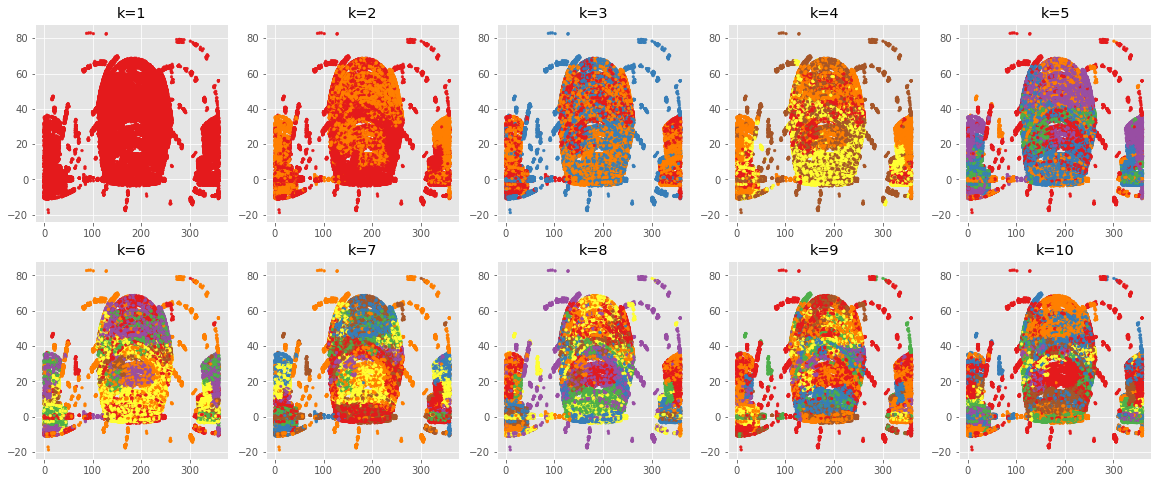

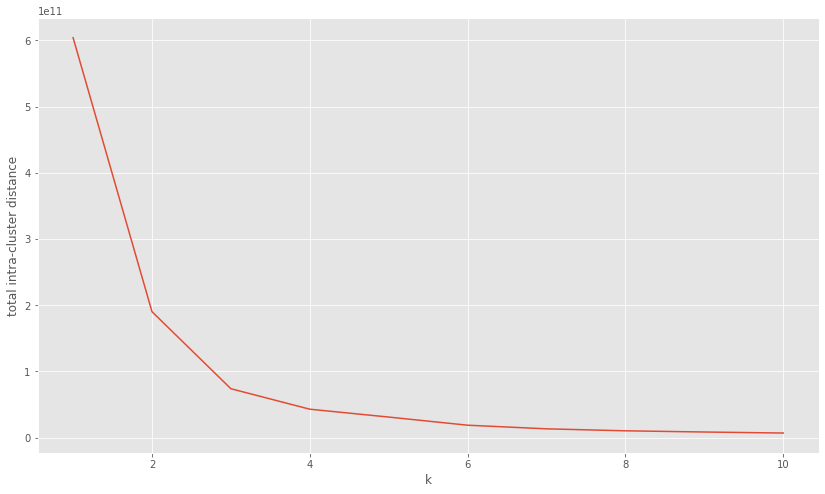

In [184]:
# clustering for k = 1 to k = 10
ks = range(1,11)
scores = []

fig, axs = plt.subplots(2,5, figsize=(20, 8))
# fig, axs = plt.subplots(1,1)

for k in ks:
    model = KMeans(n_clusters=k)
    y_pred = model.fit_predict(df.drop(['class_num'],axis=1).values)
    scores.append(-model.score(df.drop(['class_num'],axis=1)))

    subplot = axs[int((k-1)/5)][(k-1)%5]
    subplot.scatter(x='alpha', y='delta', c=y_pred, data=df,  marker="o", cmap=cmap, s=7);
    subplot.set_title("k="+str(k))

    
fig = plt.figure(figsize=(14, 8))
plt.plot(ks, scores)
plt.ylabel('total intra-cluster distance')
plt.xlabel('k')
plt.show()

# Base-Truth is k=3, elbow appears to be 3 or 4

# Rerun with less columns

In [145]:
df.columns

Index(['plate', 'z', 'redshift', 'alpha', 'delta', 'u', 'g', 'r', 'i',
       'run_ID', 'rerun_ID', 'cam_col', 'field_ID', 'fiber_ID', 'class_num'],
      dtype='object')

## k-means

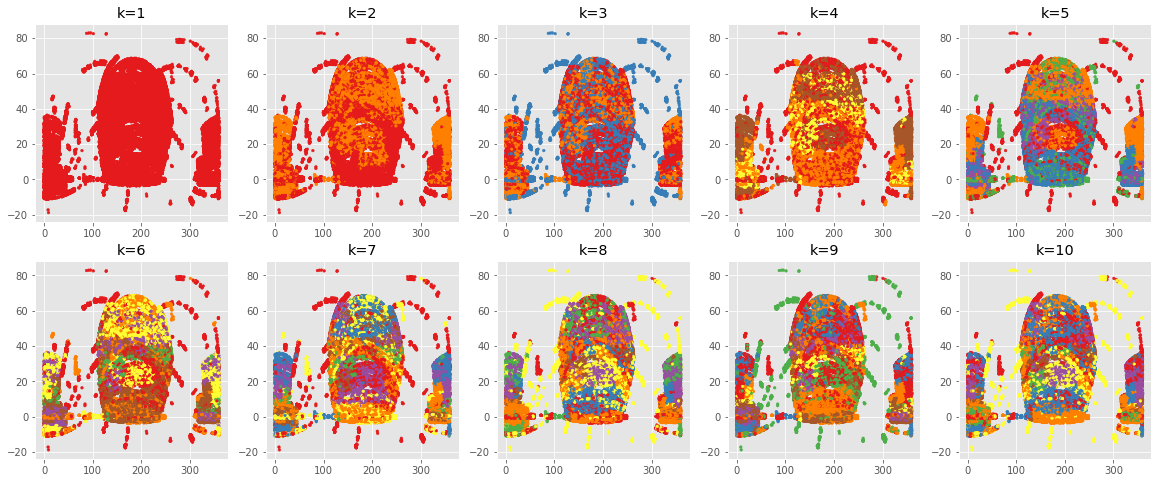

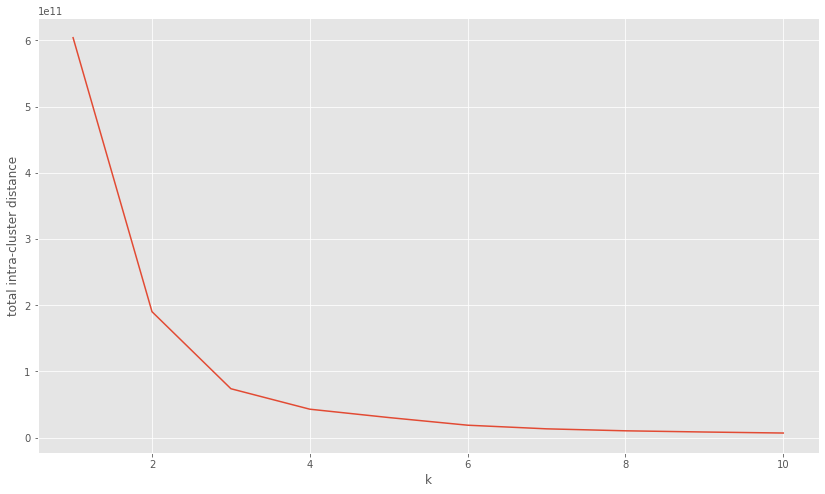

In [146]:
# clustering for k = 1 to k = 10
ks = range(1,11)
scores = []

fig, axs = plt.subplots(2,5, figsize=(20, 8))
# fig, axs = plt.subplots(1,1)

for k in ks:
    model = KMeans(n_clusters=k)
    y_pred = model.fit_predict(df.drop(['run_ID', 'rerun_ID', 
                                        'cam_col', 'field_ID', 
                                        'fiber_ID', 'class_num'],axis=1).values)
    scores.append(-model.score(df.drop(['run_ID', 'rerun_ID', 
                                        'cam_col', 'field_ID', 
                                        'fiber_ID', 'class_num'],axis=1)))

    subplot = axs[int((k-1)/5)][(k-1)%5]
    subplot.scatter(x='alpha', y='delta', c=y_pred, data=df,  marker="o", cmap=cmap, s=7);
    subplot.set_title("k="+str(k))

    
fig = plt.figure(figsize=(14, 8))
plt.plot(ks, scores)
plt.ylabel('total intra-cluster distance')
plt.xlabel('k')
plt.show()

# Elbow is more distinctly k=3 (Base-Truth) 
### Removed variables resulted in ~ order of magnitude less intra-cluster distance at k=3 than before

In [147]:
df = df.drop(['run_ID', 'rerun_ID', 'cam_col', 'field_ID', 'fiber_ID'],axis=1)
df.head(1)

plate         z  redshift       alpha      delta         u        g  \
0   5812  18.79371  0.634794  135.689107  32.494632  23.87882  22.2753   

          r         i  class_num  
0  20.39501  19.16573          0

----------

In [160]:
df.loc[:, 'z':'i'].describe()

z      redshift         alpha         delta             u  \
count  71155.000000  71155.000000  71155.000000  71155.000000  71155.000000   
mean      18.698531      0.559972    177.915118     23.393204     22.053264   
std        1.760433      0.724866     96.742143     19.196410      2.262898   
min        9.612333     -0.006863      0.005528    -18.785328     10.996230   
25%       17.361485      0.054135    127.388444      5.180588     20.301315   
50%       18.931760      0.403185    180.409105     22.178258     22.165630   
75%       19.852320      0.669046    235.285998     38.583353     23.672475   
max       29.383740      7.011245    359.999810     83.000519     32.781390   

                  g             r             i  
count  71155.000000  71155.000000  71155.000000  
mean      20.572048     19.574342     19.013418  
std        2.036990      1.849764      1.753760  
min       10.498200      9.822070      9.469903  
25%       18.869715     18.019020     17.618160  
50%       21.044410     20.048260     19.331610  
75%       22.094340     20.968310     20.278730  
max       30.607000     29.374110     32.141470

In [173]:
for col in df.columns[1:9]:
    for i in df.class_num.unique():
        print(f'class_num = {i}, column = {col}')
        print(df.loc[df['class_num']==i, col].describe())
        print()
    print()
    print()

class_num = 0, column = z
count    42903.000000
mean        18.326694
std          1.597934
min         10.441310
25%         17.030185
50%         18.655180
75%         19.362040
max         29.383740
Name: z, dtype: float64

class_num = 2, column = z
count    21059.000000
mean        18.997810
std          1.958852
min          9.612333
25%         17.515910
50%         19.266940
75%         20.602195
max         24.131590
Name: z, dtype: float64

class_num = 1, column = z
count    7193.000000
mean       20.040171
std         1.143380
min        13.762840
25%        19.363650
50%        20.178350
75%        20.817740
max        26.296900
Name: z, dtype: float64



class_num = 0, column = redshift
count    42903.000000
mean         0.422907
std          0.378804
min         -0.004136
25%          0.150036
50%          0.443611
75%          0.581835
max          7.011245
Name: redshift, dtype: float64

class_num = 2, column = redshift
count    21059.000000
mean         0.605462
std    

In [179]:
df.loc[df['class_num']==0, 'z':'i'].describe()

z      redshift         alpha         delta             u  \
count  42903.000000  42903.000000  42903.000000  42903.000000  42903.000000   
mean      18.326694      0.422907    179.076325     22.649324     22.562040   
std        1.597934      0.378804     95.209545     18.655202      2.295307   
min       10.441310     -0.004136      0.005528    -10.628261     10.996230   
25%       17.030185      0.150036    131.253907      5.334928     20.650260   
50%       18.655180      0.443611    181.233507     20.960099     22.843390   
75%       19.362040      0.581835    233.706672     36.353884     24.221210   
max       29.383740      7.011245    359.994125     82.567500     29.325650   

                  g             r             i  
count  42903.000000  42903.000000  42903.000000  
mean      20.830966     19.483431     18.733810  
std        2.119773      1.855989      1.647079  
min       10.498200     10.116040     10.008650  
25%       18.787675     17.751025     17.318945  
50%       21.511790     19.981810     19.106330  
75%       22.413225     20.854660     19.821905  
max       28.206600     27.593320     32.141470

In [182]:
df.loc[df['class_num']==2, 'z':'i'].describe()

z      redshift         alpha         delta             u  \
count  21059.000000  21059.000000  21059.000000  21059.000000  21059.000000   
mean      18.997810      0.605462    174.453265     23.413565     21.386456   
std        1.958852      1.095884     99.092918     20.009554      2.160244   
min        9.612333     -0.006863      0.027206    -18.785328     14.151990   
25%       17.515910     -0.000172    117.613343      3.456613     19.812660   
50%       19.266940      0.000054    176.268669     22.622094     21.528210   
75%       20.602195      0.784037    238.913077     39.779968     22.853400   
max       24.131590      7.011245    359.999810     83.000519     30.660390   

                  g             r             i  
count  21059.000000  21059.000000  21059.000000  
mean      20.024679     19.490022     19.192808  
std        1.996777      1.969461      1.951770  
min       10.730970      9.822070      9.469903  
25%       18.519500     17.957450     17.704690  
50%       20.386890     19.870580     19.501070  
75%       21.524875     21.104535     20.812020  
max       30.607000     29.374110     30.250090

In [181]:
df.loc[df['class_num']==1, 'z':'i'].describe()

z     redshift        alpha        delta            u  \
count  7193.000000  7193.000000  7193.000000  7193.000000  7193.000000   
mean     20.040171     1.244328   181.124335    27.770507    20.970865   
std       1.143380     0.489345    98.565498    19.364823     1.245998   
min      13.762840     0.042840     0.013337   -15.980904    15.459520   
25%      19.363650     0.862681   128.971037     8.741336    20.194120   
50%      20.178350     1.286842   185.368750    31.653353    21.077450   
75%      20.817740     1.649371   237.034847    43.095655    21.752910   
max      26.296900     2.041172   359.999615    79.259121    32.781390   

                 g            r            i  
count  7193.000000  7193.000000  7193.000000  
mean     20.630253    20.363448    20.155954  
std       1.136727     1.119624     1.107352  
min      14.156440    13.361230    14.408540  
25%      19.939450    19.691320    19.502990  
50%      20.795260    20.518500    20.311680  
75%      21.465880    21.195160    20.974990  
max      26.397540    27.397090    26.309390

# Silhouette plot

In [ ]:
range_n_clusters = [2, 3, 4, 5, 6, 7]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette coefficient of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(df[:, 0], df[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

# `ra` x `dec` visualization also indicates there are either 2 (square projection of  half-sphere--mostly the N sky) or 3 clusters--with respect to the `ra` & `dec` dimension of the feature space

In [ ]:
plt.scatter(xx[:, 0], xx[:, 1], c=Y_iris_gt, cmap=cmap);

In [228]:
ids = pd.read_csv('../../../comp5360_final/data/final_combined.csv', skiprows=1).dropna()

In [230]:
ids[ids['ra']=='ra']

name  objID  ra  dec  run  rerun  camcol  field  type  modelMag_u  \
12902   name  objID  ra  dec  run  rerun  camcol  field  type  modelMag_u   
25653   name  objID  ra  dec  run  rerun  camcol  field  type  modelMag_u   
38508   name  objID  ra  dec  run  rerun  camcol  field  type  modelMag_u   
51077   name  objID  ra  dec  run  rerun  camcol  field  type  modelMag_u   
64820   name  objID  ra  dec  run  rerun  camcol  field  type  modelMag_u   
77557   name  objID  ra  dec  run  rerun  camcol  field  type  modelMag_u   
90123   name  objID  ra  dec  run  rerun  camcol  field  type  modelMag_u   
102957  name  objID  ra  dec  run  rerun  camcol  field  type  modelMag_u   
115433  name  objID  ra  dec  run  rerun  camcol  field  type  modelMag_u   

        modelMag_g  modelMag_r  modelMag_i  modelMag_z  specObjID  plate  mjd  \
12902   modelMag_g  modelMag_r  modelMag_i  modelMag_z  specObjID  plate  mjd   
25653   modelMag_g  modelMag_r  modelMag_i  modelMag_z  specObjID  plate  mjd   
38508   modelMag_g  modelMag_r  modelMag_i  modelMag_z  specObjID  plate  mjd   
51077   modelMag_g  modelMag_r  modelMag_i  modelMag_z  specObjID  plate  mjd   
64820   modelMag_g  modelMag_r  modelMag_i  modelMag_z  specObjID  plate  mjd   
77557   modelMag_g  modelMag_r  modelMag_i  modelMag_z  specObjID  plate  mjd   
90123   modelMag_g  modelMag_r  modelMag_i  modelMag_z  specObjID  plate  mjd   
102957  modelMag_g  modelMag_r  modelMag_i  modelMag_z  specObjID  plate  mjd   
115433  modelMag_g  modelMag_r  modelMag_i  modelMag_z  specObjID  plate  mjd   

        fiberID  z  
12902   fiberID  z  
25653   fiberID  z  
38508   fiberID  z  
51077   fiberID  z  
64820   fiberID  z  
77557   fiberID  z  
90123   fiberID  z  
102957  fiberID  z  
115433  fiberID  z

In [231]:
ids = ids[ids['ra']!='ra']

In [247]:
len(df)

128410

In [248]:
len(ids)

128411

In [274]:
ids.loc[:,'modelMag_g'] = ids.loc[:,'modelMag_g'].astype(float)

C:\Users\Bob\anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [277]:
(ids['modelMag_g']).min()

-9999.0

In [266]:
idx == -9999.0

array([], dtype=bool)

In [283]:
ids = ids.drop(ids[ids['modelMag_g']==-9999].index)

In [284]:
ids['type']

0         GALAXY
1         GALAXY
2         GALAXY
3         GALAXY
4         GALAXY
           ...  
128424    GALAXY
128425    GALAXY
128426    GALAXY
128427    GALAXY
128428    GALAXY
Name: type, Length: 128410, dtype: object

In [285]:
df

ra        dec  modelMag_u  modelMag_g  modelMag_r  modelMag_i  \
0       135.689107  32.494632    23.87882    22.27530    20.39501    19.16573   
1       144.826101  31.274185    24.77759    22.83188    22.58444    21.16812   
2       142.188790  35.582444    25.26307    22.66389    20.60976    19.34857   
3       338.741038  -0.402828    22.13682    23.77656    21.61162    20.50454   
4       345.282593  21.183866    19.43718    17.58028    16.49747    15.97711   
...            ...        ...         ...         ...         ...         ...   
128424  190.575691  49.599248    24.64325    21.97179    21.13782    20.39246   
128425  208.030013   5.826776    19.79914    18.14168    17.24405    16.74151   
128426  174.859156   6.173859    19.31070    17.96233    17.22089    16.78536   
128427   34.989308  -0.885331    23.46685    22.58100    20.91271    20.09650   
128428   34.989308  -0.885331    23.46685    22.58100    20.91271    20.09650   

        modelMag_z         z  
0         18.79371  0.634794  
1         21.61427  0.779136  
2         18.94827  0.644195  
3         19.25010  0.932346  
4         15.54461  0.116123  
...            ...       ...  
128424    19.67870  0.754270  
128425    16.37945  0.082538  
128426    16.54875  0.095340  
128427    19.85487  0.346168  
128428    19.85487  0.345884  

[128410 rows x 8 columns]

In [286]:
df['type'] = ids['type']

# NO QUASARs?

In [288]:
df['type'].value_counts()

GALAXY    75126
STAR      53284
Name: type, dtype: int64

In [292]:
import seaborn as sns

# Ground Truth ('GALAXY', 'STAR')

C:\Users\Bob\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

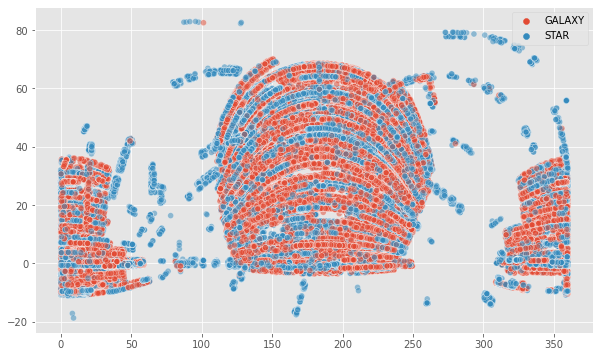

In [299]:
sns.scatterplot(xx[:, 0], xx[:, 1], hue=df['type'].values, alpha=.5)

C:\Users\Bob\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

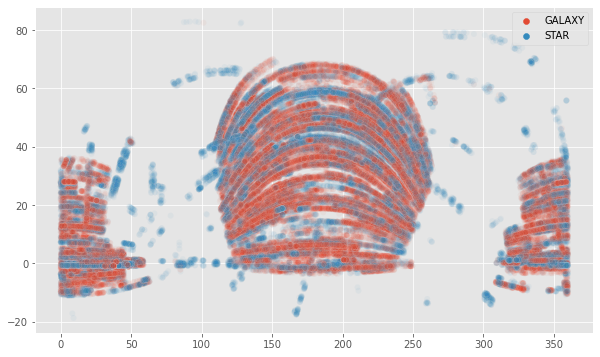

In [298]:
sns.scatterplot(xx[:, 0], xx[:, 1], hue=df['type'].values, alpha=.05)

C:\Users\Bob\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

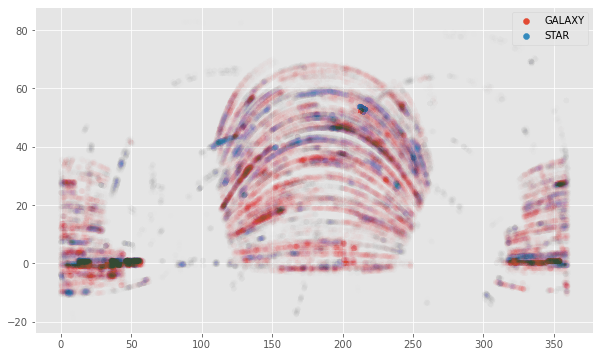

In [297]:
sns.scatterplot(xx[:, 0], xx[:, 1], hue=df['type'].values, alpha=.005)

In [305]:
df.columns

Index(['ra', 'dec', 'modelMag_u', 'modelMag_g', 'modelMag_r', 'modelMag_i',
       'modelMag_z', 'z', 'type'],
      dtype='object')

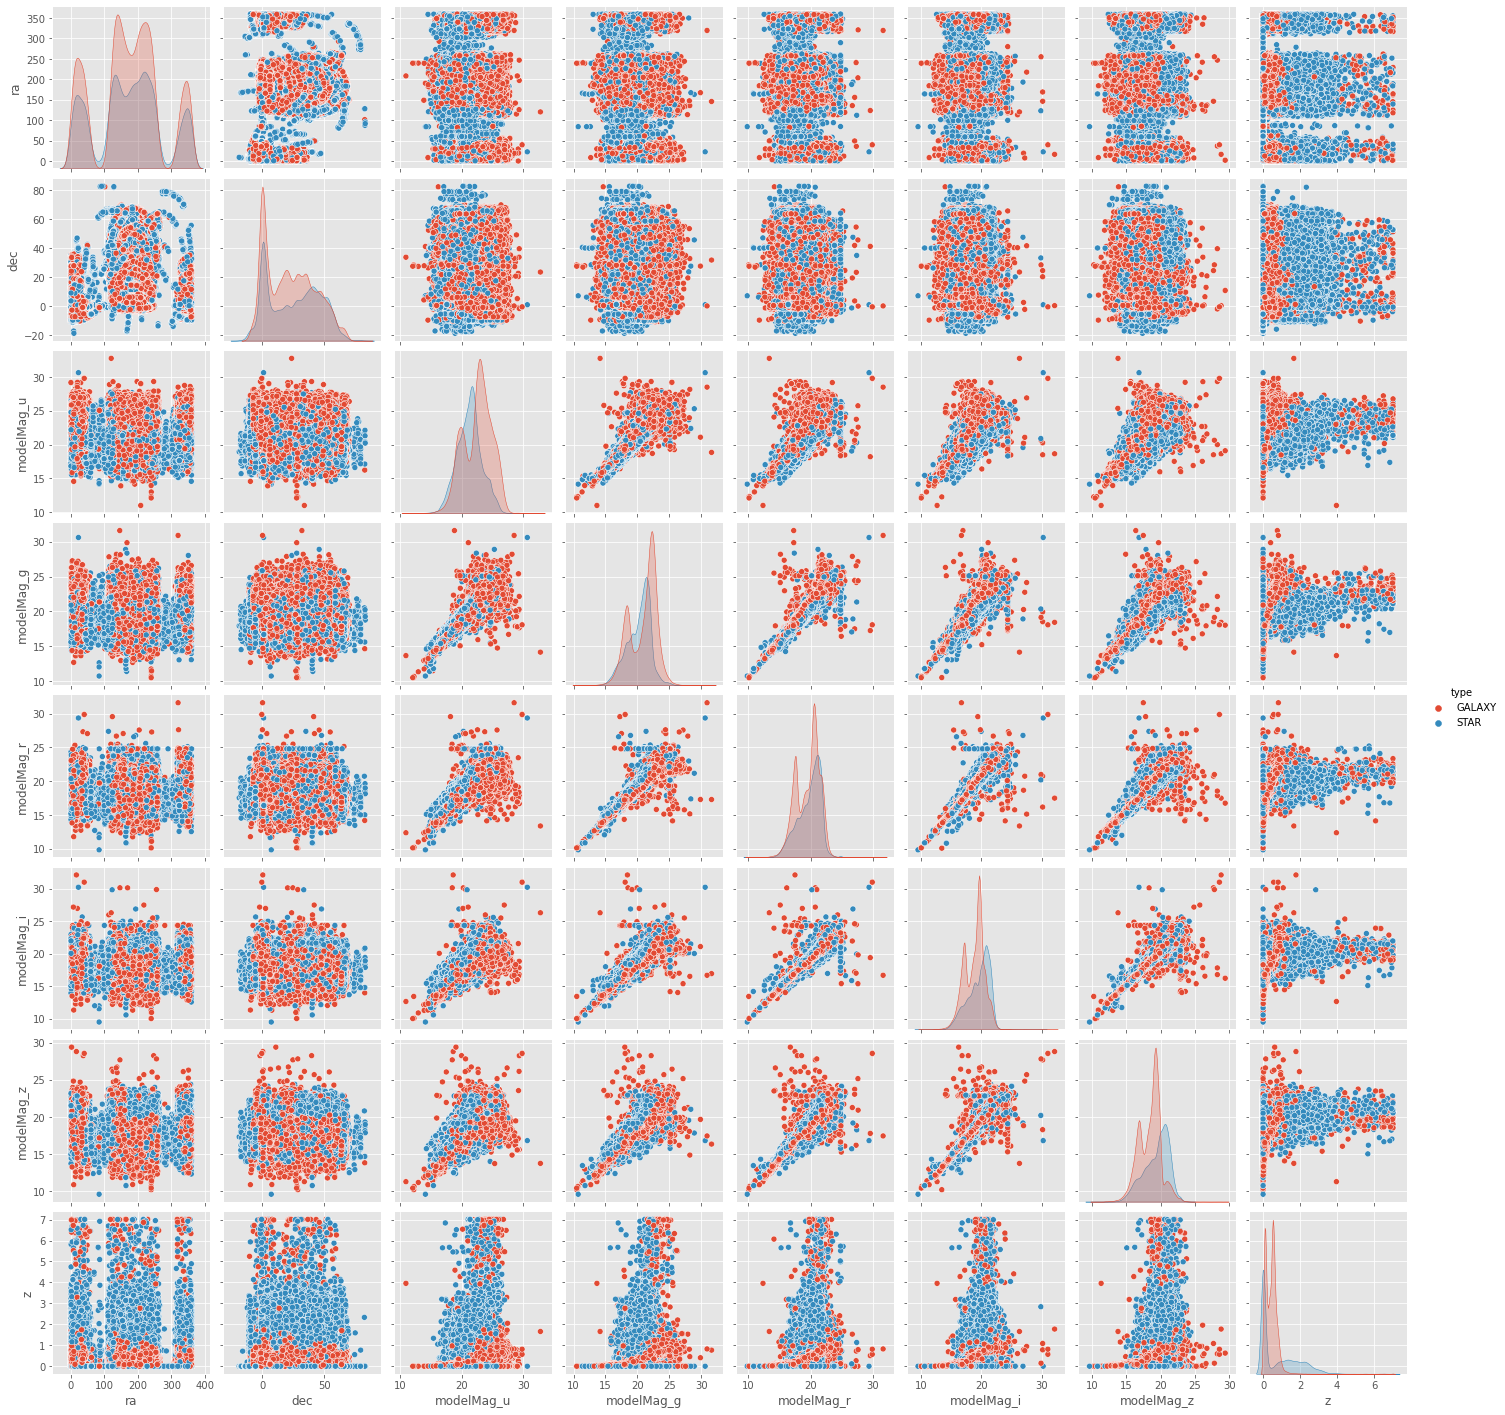

In [309]:
sns.pairplot(df, hue='type')

<AxesSubplot:xlabel='modelMag_i', ylabel='modelMag_r'>

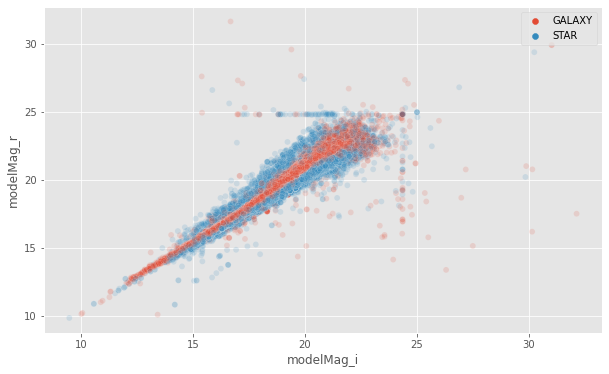

In [314]:
sns.scatterplot(x='modelMag_i', y='modelMag_r', data=df, hue=df['type'].values, alpha=.15)

<AxesSubplot:xlabel='modelMag_i', ylabel='modelMag_r'>

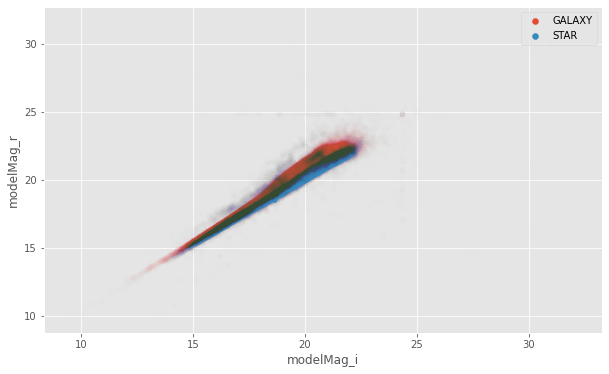

In [330]:
sns.scatterplot(x='modelMag_i', y='modelMag_r', data=df, hue=df['type'].values, alpha=.002)

<AxesSubplot:xlabel='z', ylabel='modelMag_z'>

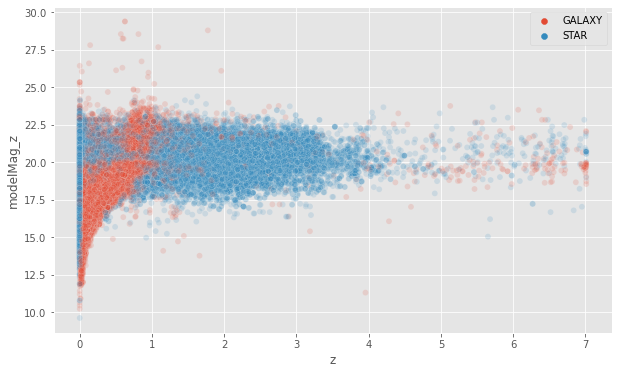

In [315]:
sns.scatterplot(x='z', y='modelMag_z', data=df, hue=df['type'].values, alpha=.15)

<AxesSubplot:xlabel='z', ylabel='modelMag_z'>

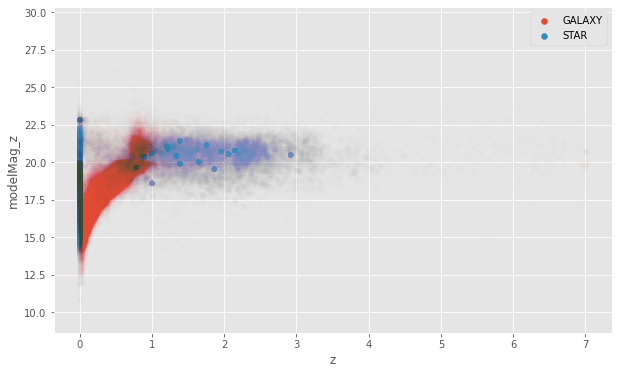

In [322]:
sns.scatterplot(x='z', y='modelMag_z', data=df, hue=df['type'].values, alpha=.0025)

<AxesSubplot:xlabel='modelMag_g', ylabel='modelMag_z'>

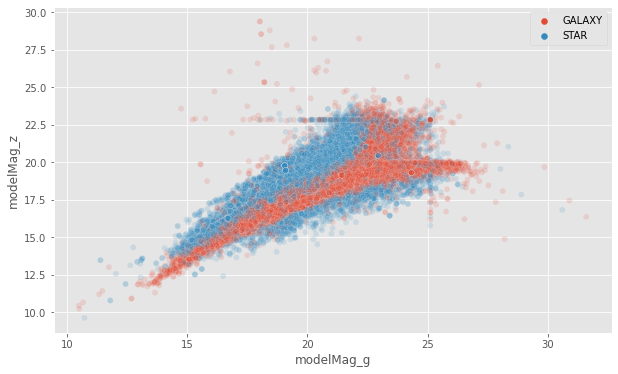

In [313]:
sns.scatterplot(x='modelMag_g', y='modelMag_z', data=df, hue=df['type'].values, alpha=.15)

<AxesSubplot:xlabel='modelMag_g', ylabel='modelMag_z'>

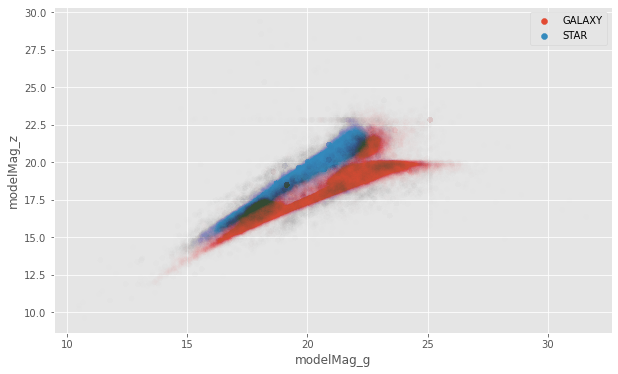

In [325]:
sns.scatterplot(x='modelMag_g', y='modelMag_z', data=df, hue=df['type'].values, alpha=.0025)